<a href="https://colab.research.google.com/github/sreetabasu1/Regime-Aware-Feature-Selection-Carry-Trade/blob/main/FinalCode2/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we pre-process the data, calculating returns and filling in missing values.

In [2]:
#code formatting

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load data from the Excel file into a DataFrame with headers
file_path = 'Currency12_07.csv'
exchange_df = pd.read_csv(file_path, header=0, index_col=0, parse_dates=True)

# Calculate returns for each column
returns_df = exchange_df.diff() / exchange_df.shift(1)
returns_df = returns_df.iloc[:, :]
returns_df.fillna(0, inplace=True)

# Test Train split

cutoff = pd.to_datetime('2018-12-30', format='%Y-%m-%d')
test = returns_df[returns_df.index >= cutoff]

returns_df = returns_df[returns_df.index < cutoff]
print(returns_df)


            Australia    Canada     China   Denmark  Hong Kong     India  \
date                                                                       
1981-01-02   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
1981-01-05  -0.003777 -0.005189  0.005019 -0.013522  -0.001558 -0.010139   
1981-01-06  -0.003673 -0.000337 -0.009988 -0.004179   0.000585  0.010243   
1981-01-07   0.000000 -0.000168  0.000000  0.005959   0.000195 -0.003802   
1981-01-08   0.002140 -0.000084  0.000000  0.008427   0.002534  0.011450   
...               ...       ...       ...       ...        ...       ...   
2018-12-24   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
2018-12-25   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
2018-12-26   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
2018-12-27   0.007141  0.005451 -0.002876 -0.000611  -0.000051  0.003853   
2018-12-28  -0.003440 -0.001538  0.001544 -0.002645   0.000370 -0.005971   

           

Now, we train a Hidden Markov Model on the data.

In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 2.0 MB/s eta 0:00:00


In [ ]:
#!pip install hmmlearn
from hmmlearn import hmm
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming the data is numeric (you may need to preprocess your data accordingly)
# Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
data = scaler.fit_transform(returns_df)
#index = returns_df['indexgx'].values.reshape(-1, 1)

# Create and fit an HMM model
num_states = 3  # Adjust the number of hidden states as needed
model = hmm.GaussianHMM(n_components=num_states, covariance_type="full")
model.fit(data)

# Predict the hidden states for each sequence in the dataset
hidden_states = model.predict(data)
returns_df["Hidden_State"] = hidden_states

transition_matrix = model.transmat_


[[0.47461317 0.24706484 0.27832199]
 [0.17745263 0.63634024 0.18620713]
 [0.29754867 0.25835116 0.44410017]]


We generate a decision tree to understand the features of the hidden states found. We will later compare the decision tree for the HMM to the decision tree of the K-means clustering, to distinguish the features used in each model.

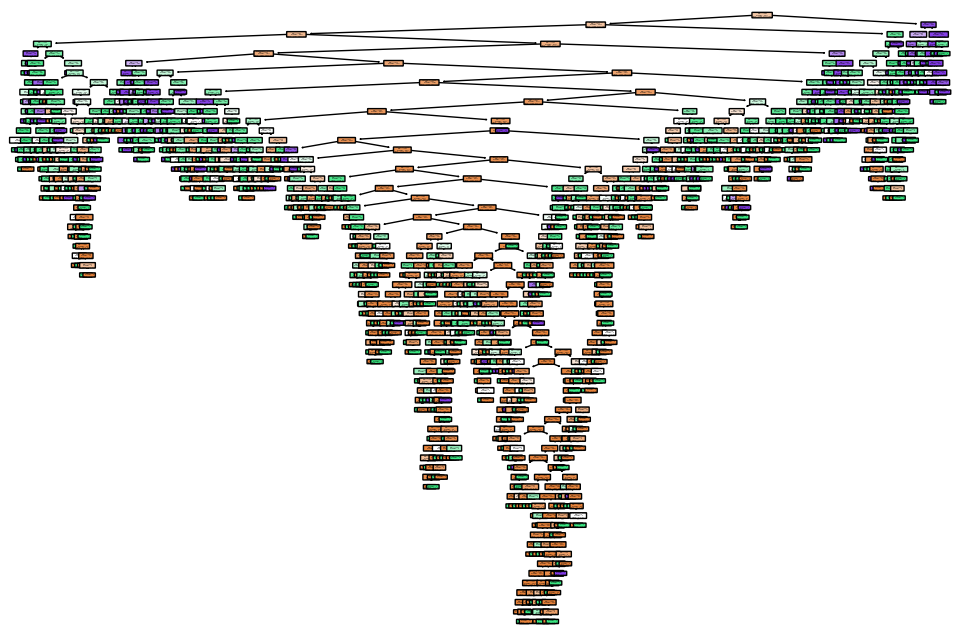

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Split the data into features (X) and target variable (y)
X = returns_df.drop('Hidden_State', axis=1)  # Features
y = returns_df['Hidden_State']  # Target variable
# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
decision_tree.fit(X, y)

# Make predictions on the test set
y_pred = decision_tree.predict(X)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, rounded=True)
plt.savefig('hmm_decision_tree.png')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Now, we run PCA and report results, including tables for eigenvalues, factor loadings and components and bar graphs for explained variance.

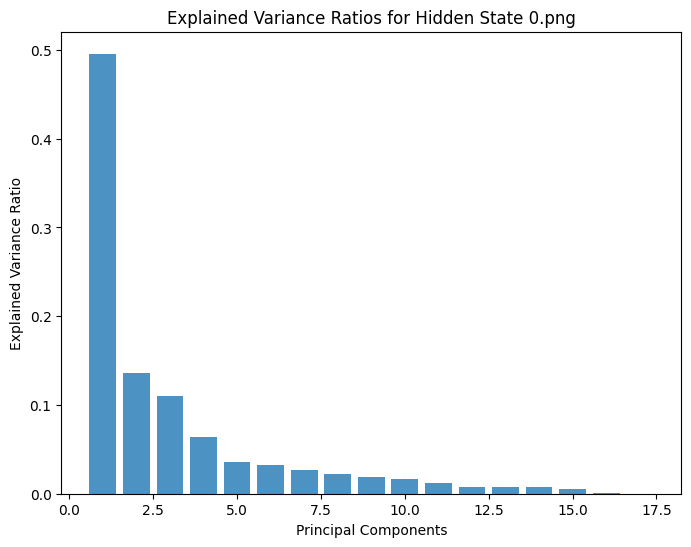

Number of components to explain 95% of variance: 10
Eigenvalues:
Eigenvalue 1: 0.00014490188611775858
Eigenvalue 2: 3.984353701612277e-05
Eigenvalue 3: 3.22613413169793e-05
Eigenvalue 4: 1.8522808812970232e-05
Eigenvalue 5: 1.0501877372678023e-05
Eigenvalue 6: 9.559156974268293e-06
Eigenvalue 7: 7.938061348690463e-06
Eigenvalue 8: 6.587154161122912e-06
Eigenvalue 9: 5.577084284195407e-06
Eigenvalue 10: 4.7476874950004035e-06
Eigenvalue 11: 3.43503110275759e-06
Eigenvalue 12: 2.2267255703791336e-06
Eigenvalue 13: 2.2104307393772446e-06
Eigenvalue 14: 2.150112616825544e-06
Eigenvalue 15: 1.69522461437047e-06
Eigenvalue 16: 1.0526265816642039e-07
Eigenvalue 17: 5.5119480200490825e-08
              PC1             PC2             PC3             PC4  \
0     Switzerland    South Africa     New Zealand           Japan   
1         Denmark     Switzerland       Australia          Sweden   
2          Norway       Australia    South Africa          Norway   
3          Sweden     New Zealand 

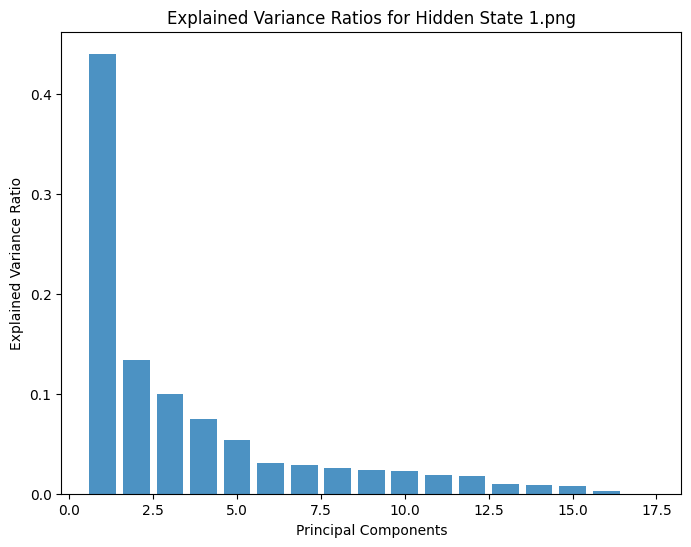

Number of components to explain 95% of variance: 11
Eigenvalues:
Eigenvalue 1: 0.00047378384615849226
Eigenvalue 2: 0.0001436573021678182
Eigenvalue 3: 0.00010745268176546442
Eigenvalue 4: 8.057241987686713e-05
Eigenvalue 5: 5.772224299730792e-05
Eigenvalue 6: 3.257539945555263e-05
Eigenvalue 7: 3.130948200183331e-05
Eigenvalue 8: 2.7918524046058676e-05
Eigenvalue 9: 2.5194735367865413e-05
Eigenvalue 10: 2.4268407470173378e-05
Eigenvalue 11: 2.064736759132837e-05
Eigenvalue 12: 1.9299685592665196e-05
Eigenvalue 13: 1.0444600553431624e-05
Eigenvalue 14: 9.339282222377734e-06
Eigenvalue 15: 8.310574605909347e-06
Eigenvalue 16: 2.4515984263430716e-06
Eigenvalue 17: 1.477025514858158e-07
              PC1             PC2           PC3             PC4  \
0    South Africa    South Africa     Australia        Malaysia   
1       Australia     Switzerland  South Africa        Thailand   
2     New Zealand           Japan   New Zealand           Japan   
3          Norway         Denmark   Swi

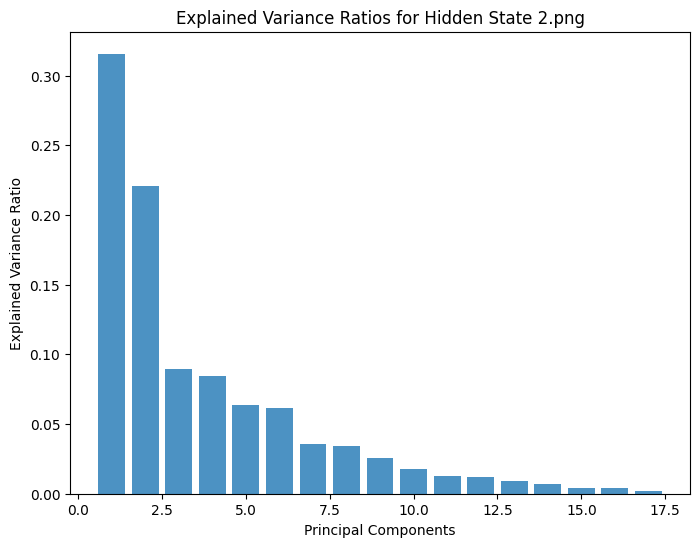

Number of components to explain 95% of variance: 11
Eigenvalues:
Eigenvalue 1: 0.0003718936272594763
Eigenvalue 2: 0.000259793933157433
Eigenvalue 3: 0.00010543994081891384
Eigenvalue 4: 9.972962806795235e-05
Eigenvalue 5: 7.484487001218471e-05
Eigenvalue 6: 7.2614675527249e-05
Eigenvalue 7: 4.233051191685883e-05
Eigenvalue 8: 4.0091053962394516e-05
Eigenvalue 9: 3.0602853375562336e-05
Eigenvalue 10: 2.0542092195449047e-05
Eigenvalue 11: 1.5293458593485697e-05
Eigenvalue 12: 1.4171259404582462e-05
Eigenvalue 13: 1.0508450333600697e-05
Eigenvalue 14: 7.83706555913562e-06
Eigenvalue 15: 5.251492273973562e-06
Eigenvalue 16: 4.416960836147486e-06
Eigenvalue 17: 2.4575402203788448e-06
              PC1             PC2             PC3             PC4  \
0           China     Switzerland        Thailand     New Zealand   
1     Switzerland         Denmark     New Zealand        Thailand   
2         Denmark  United Kingdom           India         Denmark   
3  United Kingdom           Japan  

In [ ]:
from sklearn.preprocessing import normalize

def rank_top_contributors(column_df, n_top=10):
    abs_column = np.abs(column_df)
    abs_loadings = pd.Series(abs_column, index=returns_df.columns)
    top_contributors = abs_loadings.nlargest(n_top).index.tolist()
    return top_contributors

top_contributors = {f'Hidden State {i}':[] for i in range(num_states)} #set as list
explained_variance_HMM = {f'Hidden State {i}':[] for i in range(num_states)} #set as list

for hidden_state in range(num_states):
    # Select rows for the current hidden state
    returns_state_df = returns_df[returns_df['Hidden_State'] == hidden_state]

    # Perform PCA on the selected rows
    pca = PCA()
    principal_components = pca.fit_transform(returns_state_df.iloc[:, :-1])  # Exclude 'HiddenState'

    # Create a DataFrame with the principal components
    result_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, len(principal_components[0]) + 1)], index=returns_state_df.index)

    # Calculate the loadings (contributions) of each currency for each principal component
    loadings_matrix = pca.components_.T
    loadings_matrix = loadings_matrix / loadings_matrix.sum(axis=0)

    # Create a DataFrame with the loadings matrix
    loadings_df = pd.DataFrame(loadings_matrix, columns=result_df.columns, index=returns_state_df.columns[:-1])  # Exclude 'HiddenState'

    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    title = 'Hidden State ' + str(hidden_state)
    explained_variance_HMM[title] = explained_variance_ratio
    title = 'Explained Variance Ratios for Hidden State ' + str(hidden_state) + '.png'

    # Plot explained variance ratio
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title(title)
    plt.savefig(title)
    plt.show()

  # Select the number of components based on the explained variance ratio
  # You can set a threshold, for example, 95% of variance explained
    cumulative_variance_ratio = explained_variance_ratio.cumsum()
    num_components = len(cumulative_variance_ratio[cumulative_variance_ratio < 0.95]) + 1
    print(f"Number of components to explain 95% of variance: {num_components}")

    eigenvalues = pca.explained_variance_

    # Print the eigenvalues
    print("Eigenvalues:")
    for i, eigenvalue in enumerate(eigenvalues):
      print(f"Eigenvalue {i + 1}: {eigenvalue}")

    # Create a DataFrame with the top contributors for each individual column of the loadings matrix
    top_contributors_state_df = pd.DataFrame()

    #top_contributors_state_df = pd.DataFrame(index=returns_df.columns[:-1])  # Exclude 'HiddenState'
    for col in loadings_df.columns:
        top_contributors_state_df[col] = rank_top_contributors(loadings_df[col])

    print(top_contributors_state_df)
    # Calculate factor values
    cluster_returns = pd.DataFrame(
    data=np.dot(returns_df.drop('Hidden_State', axis=1).values, loadings_matrix),
    columns=[f'Factor_{i+1}' for i in range(loadings_matrix.shape[1])],index=returns_df.index,
    ) + 1

    # Calculate cumulative product for each column
    cumulative_returns = cluster_returns.cumprod()
    last_row = cumulative_returns.iloc[-1]

    print(f'Cumulative Returns for Hidden State {hidden_state}:\n{last_row}\n')

    # Find the highest cumulative return in each column
    max_cumulative_returns = cumulative_returns.max()

    print(f'Highest Cumulative Returns for Hidden State {hidden_state}:\n{max_cumulative_returns}\n')

    # Append the top contributors DataFrame to the main DataFrame
    title = 'Hidden State '+str(hidden_state)
    top_contributors[title].append(top_contributors_state_df)
    print(f'Loadings Hidden State {hidden_state}', loadings_df)

for i in range(num_states):
  print(top_contributors['Hidden State 0'])
  print(top_contributors['Hidden State 1'])
  print(top_contributors['Hidden State 2'])



#data = np.dot(test, loadings_matrix)
# Calculate factor values
#factor_values = pd.DataFrame(
#    data=np.dot(test, loadings_matrix),
#    columns=[f'Factor_{i+1}' for i in range(loadings_matrix.shape[1])]
#) + 1

# Loop through clusters and calculate cumulative returns
#for cluster in range(3):
#    cluster_returns = factor_values

    # Calculate cumulative product for each column
#    cumulative_returns = cluster_returns.cumprod()
#    last_row = cumulative_returns.iloc[-1]

#    print(f'Cumulative Returns for Hidden State {cluster}:\n{last_row}\n')

    # Find the highest cumulative return in each column
#    max_cumulative_returns = cumulative_returns.max()

#    print(f'Highest Cumulative Returns for Hidden State {cluster}:\n{max_cumulative_returns}\n')

#

Here, we determine the accuracy, precision and recall of the HMM in prediction US Recessions.

In [ ]:
!pip install sklearn
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming you have returns_df and date_ranges defined

date_ranges = [
    ('1973-11-01', '1975-03-31'),
    ('1980-01-01', '1980-07-31'),
    ('1981-07-01', '1982-11-30'),
    ('1990-07-01', '1990-07-31'),
    ('1991-03-01', '1991-03-31'),
    ('2001-03-01', '2001-11-30'),
    ('2007-12-01', '2009-06-30'),
]

returns_df['US Recession'] = 0  # Default value

for start_date, end_date in date_ranges:
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    returns_df.loc[(returns_df.index >= start_date) & (returns_df.index <= end_date), 'US Recession'] = 1

# Creating a copy
testing_df = returns_df.copy()

testing_df['Recession_12'] = np.where(testing_df['Hidden_State'].isin([1, 2]), 0, 1)
train_accuracy = accuracy_score(testing_df['Recession_12'], returns_df['US Recession'])
print(f"Training Accuracy, 12 = recc: {train_accuracy:.4f}")
conf_matrix = confusion_matrix(testing_df['Recession_12'], returns_df['US Recession'])
print(conf_matrix)
precision = precision_score(testing_df['Recession_12'], returns_df['US Recession'])
recall = recall_score(testing_df['Recession_12'], returns_df['US Recession'])
# Print results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


NameError: ignored

We determine the precision, recall and accuracy of the HMM in predicting global recessions.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame called returns_df

date_ranges = [
    ('1975-01-01', '1975-12-31'),
    ('1982-01-01', '1982-12-31'),
    ('1991-01-01', '1991-12-31'),
    ('2009-01-01', '2009-12-31'),
]

returns_df['Global Recession'] = 0  # Default value

# Set Recession values to 1 based on date_ranges
for start_date, end_date in date_ranges:
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    returns_df.loc[(returns_df.index >= start_date) & (returns_df.index <= end_date), 'Global Recession'] = 1

# Create a copy of the DataFrame for testing purposes
testing_df = returns_df.copy()

# Modify testing_df based on Hidden_State values
testing_df['Recession_01'] = testing_df['Hidden_State'].apply(lambda x: 1 if x in [0, 1] else 0)
train_accuracy_01 = accuracy_score(testing_df['Recession_01'], returns_df['Global Recession'])
print(f"Training Accuracy, 01 = recc: {train_accuracy_01:.4f}")

# Swap values for testing_df and calculate accuracy
testing_df['Recession_01'] = testing_df['Hidden_State'].apply(lambda x: 0 if x in [0, 1] else 1)
train_accuracy_not_01 = accuracy_score(testing_df['Recession_01'], returns_df['Global Recession'])
print(f"Training Accuracy, 01 = NOT recc: {train_accuracy_not_01:.4f}")

# Modify testing_df based on Hidden_State values
testing_df['Recession_12'] = testing_df['Hidden_State'].apply(lambda x: 1 if x in [2, 1] else 0)
train_accuracy_01 = accuracy_score(testing_df['Recession_12'], returns_df['Global Recession'])
print(f"Training Accuracy, 01 = recc: {train_accuracy_01:.4f}")

# Swap values for testing_df and calculate accuracy
testing_df['Recession_12'] = testing_df['Hidden_State'].apply(lambda x: 0 if x in [2, 1] else 1)
train_accuracy_not_01 = accuracy_score(testing_df['Recession_12'], returns_df['Global Recession'])
print(f"Training Accuracy, 01 = NOT recc: {train_accuracy_not_01:.4f}")

# Modify testing_df based on Hidden_State values
testing_df['Recession_02'] = testing_df['Hidden_State'].apply(lambda x: 1 if x in [0, 2] else 0)
train_accuracy_01 = accuracy_score(testing_df['Recession_02'], returns_df['Global Recession'])
print(f"Training Accuracy, 02 = recc: {train_accuracy_01:.4f}")

# Swap values for testing_df and calculate accuracy
testing_df['Recession_02'] = testing_df['Hidden_State'].apply(lambda x: 0 if x in [0, 2] else 1)
train_accuracy_not_01 = accuracy_score(testing_df['Recession_02'], returns_df['Global Recession'])
print(f"Training Accuracy, 02 = NOT recc: {train_accuracy_not_01:.4f}")

from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(testing_df['Recession_02'], returns_df['Global Recession'])
recall = recall_score(testing_df['Recession_02'], returns_df['Global Recession'])

# Calculate confusion matrix (optional but useful for more detailed evaluation)
conf_matrix = confusion_matrix(testing_df['Recession_02'], returns_df['Global Recession'])

# Print results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)



Training Accuracy, 01 = recc: 0.6363
Training Accuracy, 01 = NOT recc: 0.3637
Training Accuracy, 01 = recc: 0.2244
Training Accuracy, 01 = NOT recc: 0.7756
Training Accuracy, 02 = recc: 0.2183
Training Accuracy, 02 = NOT recc: 0.7817
Precision: 0.1865
Recall: 0.0873
Confusion Matrix:
[[7601  637]
 [1527  146]]


Now, we run the k-means clustering algorithm.

In [ ]:


# Load data from the Excel file into a DataFrame with headers
file_path = 'Currency12_07.csv'
df = pd.read_csv(file_path, header=0, index_col=0, parse_dates=True)

# Calculate returns for each column
returns_df = df.diff() / df.shift(1)
returns_df = returns_df.iloc[1:, :]
returns_df.fillna(0, inplace=True)

# Assuming that the currency values are columns in the DataFrame
# You may need to adjust the columns based on your actual data
returns_df = returns_df.iloc[:, :]

date_ranges = [
    ('1973-11-01', '1975-03-31'),
    ('1980-01-01', '1980-07-31'),
    ('1981-07-01', '1982-11-30'),
    ('1990-07-01', '1990-07-31'),
    ('1991-03-01', '1991-03-31'),
    ('2001-03-01', '2001-11-30'),
    ('2007-12-01', '2009-06-30'),
]

returns_df['Recession'] = 0  # Default value
for start_date, end_date in date_ranges:
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    returns_df.loc[(returns_df.index >= start_date) & (returns_df.index <= end_date), 'Recession'] = 1

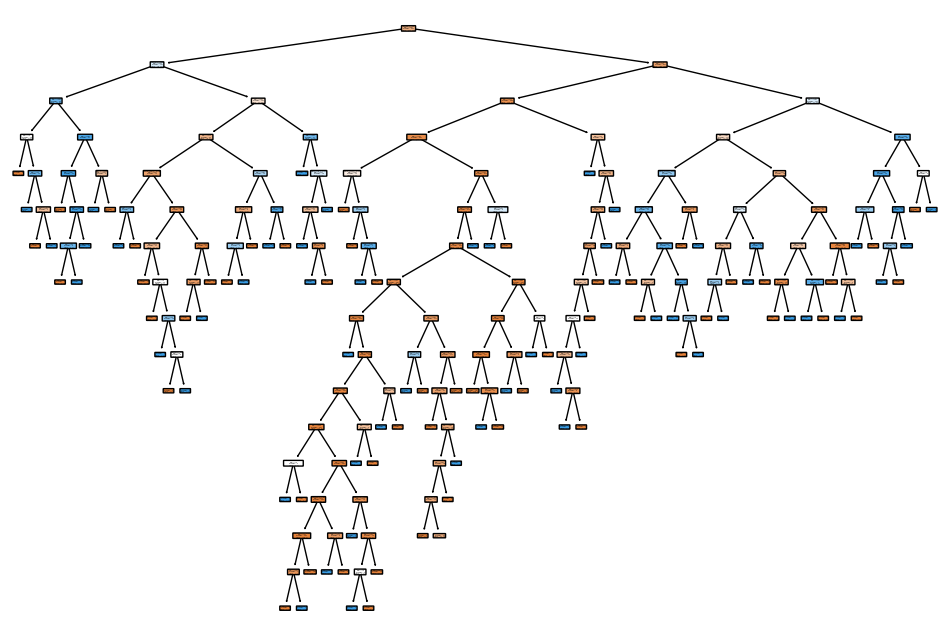

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Split the data into features (X) and target variable (y)
X = returns_df.drop('Recession', axis=1)  # Features
y = returns_df['Recession']  # Target variable
# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
decision_tree.fit(X, y)

# Make predictions on the test set
y_pred = decision_tree.predict(X)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, rounded=True)
plt.show()

In [ ]:
!pip install kneed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator  # Install with: pip install kneed

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

The optimal value of k is: 4


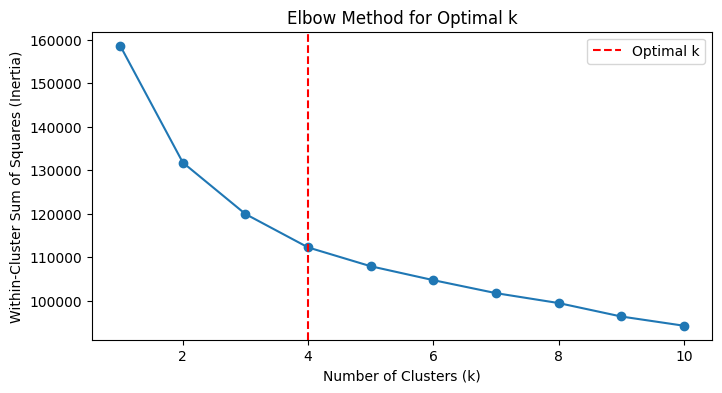

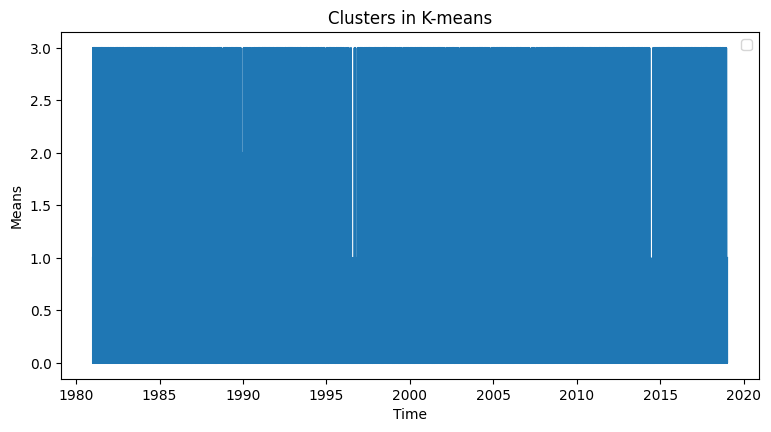

In [ ]:
from sklearn.preprocessing import StandardScaler
# Load data from the Excel file into a DataFrame with headers
file_path = 'Currency12_07.csv'
df = pd.read_csv(file_path, header=0, index_col=0, parse_dates=True)

# Calculate returns for each column
returns_df = df.diff() / df.shift(1)
returns_df = returns_df.iloc[1:, :]
returns_df.fillna(0, inplace=True)

# Assuming that the currency values are columns in the DataFrame
# You may need to adjust the columns based on your actual data
currency_data = returns_df.iloc[:, 1:]

# Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
currency_data_scaled = scaler.fit_transform(currency_data)

# Run k-means with different values of k
max_k = 10  # You can adjust the maximum value of k
inertias = []

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(currency_data_scaled)
    inertias.append(kmeans.inertia_)

# Use the KneeLocator to find the "elbow" point
knee_locator = KneeLocator(range(1, max_k + 1), inertias, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

# Run k-means with the optimal value of k
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_kmeans.fit(currency_data_scaled)
labels = optimal_kmeans.labels_

# Add the cluster labels to the original DataFrame
returns_df['Cluster'] = labels

# Print the optimal value of k
print(f"The optimal value of k is: {optimal_k}")

# Visualize the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(1, max_k + 1), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.axvline(optimal_k, color='red', linestyle='--', label='Optimal k')
plt.savefig('Elbow.png')
plt.legend()
plt.show()

# Plotting the hidden states
plt.figure(figsize=(9, 4.5))
plt.plot(returns_df.index, labels)
plt.title('Clusters in K-means')
plt.xlabel('Time')
plt.ylabel('Means')
plt.legend()
plt.show()




Now, we run PCA on the k-means clusters.

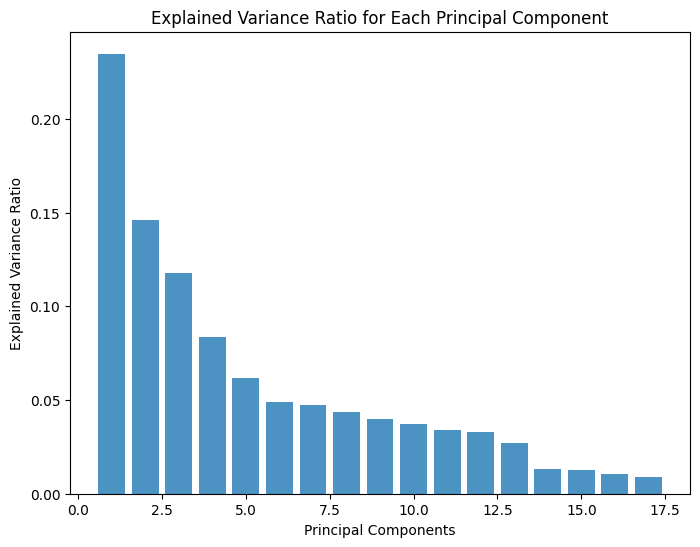

Number of components to explain 95% of variance: 13
Eigenvalues:
Eigenvalue 1: 6.071096129476926e-05
Eigenvalue 2: 3.77058663735022e-05
Eigenvalue 3: 3.0443374177437278e-05
Eigenvalue 4: 2.1680489032084138e-05
Eigenvalue 5: 1.5920210820334616e-05
Eigenvalue 6: 1.26431162276832e-05
Eigenvalue 7: 1.2290665957137276e-05
Eigenvalue 8: 1.1278227966137432e-05
Eigenvalue 9: 1.0243219191946447e-05
Eigenvalue 10: 9.589837955545192e-06
Eigenvalue 11: 8.758082400414849e-06
Eigenvalue 12: 8.547949806943392e-06
Eigenvalue 13: 7.021560790117554e-06
Eigenvalue 14: 3.411357865200676e-06
Eigenvalue 15: 3.215329799877711e-06
Eigenvalue 16: 2.6931984052759417e-06
Eigenvalue 17: 2.3304781292627434e-06
            PC1           PC2          PC3        PC4          PC5  \
0     Australia     Australia       Sweden      Japan     Thailand   
1  South Africa   New Zealand  Switzerland     Sweden       Sweden   
2   New Zealand        Canada    Australia  Singapore    Singapore   
3        Canada  South Africa

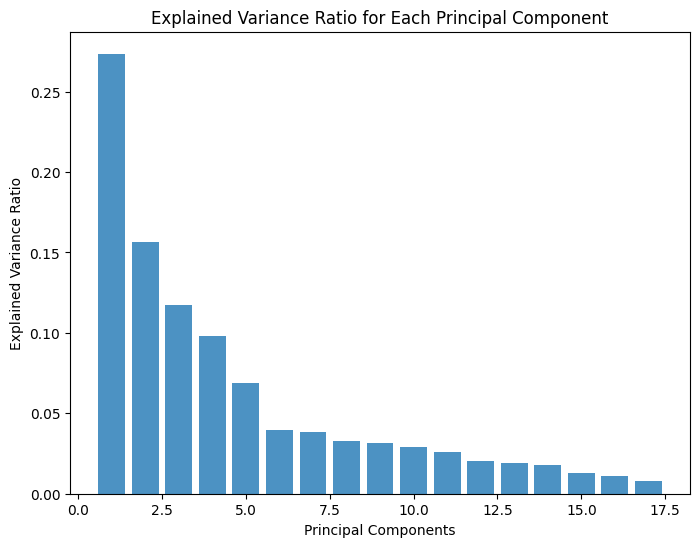

Number of components to explain 95% of variance: 13
Eigenvalues:
Eigenvalue 1: 0.00014674554014789954
Eigenvalue 2: 8.402133801691889e-05
Eigenvalue 3: 6.278582784365892e-05
Eigenvalue 4: 5.2729770245321974e-05
Eigenvalue 5: 3.686564350617518e-05
Eigenvalue 6: 2.1333128108534422e-05
Eigenvalue 7: 2.0486537113072006e-05
Eigenvalue 8: 1.7590546166461777e-05
Eigenvalue 9: 1.6752711554869823e-05
Eigenvalue 10: 1.5529550510490577e-05
Eigenvalue 11: 1.386620300732785e-05
Eigenvalue 12: 1.1064886985397771e-05
Eigenvalue 13: 1.0286218482846796e-05
Eigenvalue 14: 9.467273988753724e-06
Eigenvalue 15: 7.039843114145799e-06
Eigenvalue 16: 5.768498059871168e-06
Eigenvalue 17: 4.109548391451921e-06
            PC1        PC2           PC3        PC4        PC5  \
0     Australia  Australia     Australia      Japan     Sweden   
1        Sweden     Sweden        Sweden     Sweden  Australia   
2     Singapore      Japan     Singapore  Singapore      Japan   
3        Canada   Thailand  South Africa  

<ipython-input-8-a5591e1acec9>:25: RuntimeWarning: invalid value encountered in divide
  loadings_matrix = loadings_matrix/loadings_matrix.sum(axis=0)


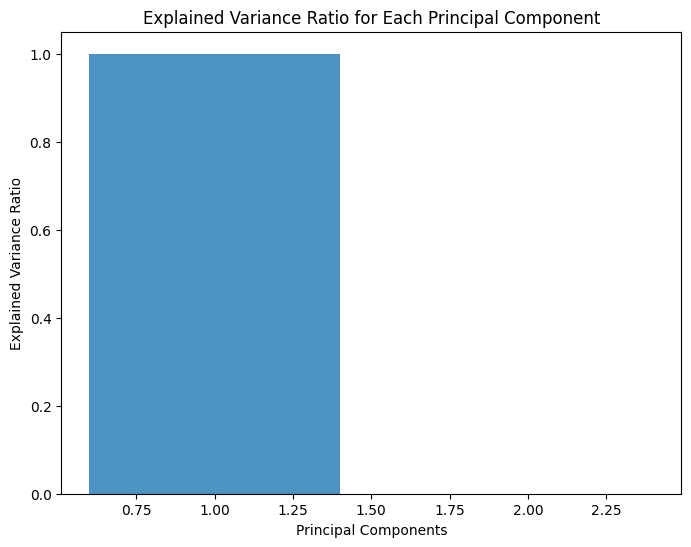

Number of components to explain 95% of variance: 1
Eigenvalues:
Eigenvalue 1: 0.0269346184786597
Eigenvalue 2: 1.0359521511201428e-34
         PC1        PC2
0     Sweden     Sweden
1      China   Srilanka
2     Norway  Hong Kong
3   Srilanka   Thailand
4  Hong Kong      Japan
                      PC1        PC2
Australia       -0.040802   1.040802
Canada          -0.195545   1.195545
China            0.945022   0.054978
Denmark          0.052487   0.947513
Hong Kong       -0.464443   1.464443
India           -0.348777   1.348777
Japan           -0.369959   1.369959
Malaysia        -0.334892   1.334892
New Zealand     -0.201155   1.201155
Norway           0.918498   0.081502
Singapore       -0.342292   1.342292
South Africa     0.000000   0.000000
Srilanka        -0.484531   1.484531
Sweden          11.009711 -10.009711
Switzerland     -0.344102   1.344102
Thailand        -0.462401   1.462401
United Kingdom   0.402736   0.597264
Cumulative Returns for Cluster 2:
Factor_1    1.433782e-

In [ ]:
from sklearn.decomposition import PCA

def rank_top_contributors(column_df, n_top=5):
    abs_column = np.abs(column_df)
    abs_loadings = pd.Series(abs_column, index=returns_df.columns)
    top_contributors = abs_loadings.nlargest(n_top).index.tolist()
    return top_contributors

top_contributors = {f'Cluster {i}':[] for i in range(3)} #set as list
explained_variance_KM = {f'Cluster {i}':[] for i in range(3)} #set as list

for cluster in range(3):
    # Select rows for the current hidden state
    returns_state_df = returns_df[returns_df['Cluster'] == cluster]

    # Perform PCA on the selected rows
    pca = PCA()
    principal_components = pca.fit_transform(returns_state_df.iloc[:, :-1])  # Exclude 'HiddenState'

    # Create a DataFrame with the principal components
    result_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, len(principal_components[0]) + 1)], index=returns_state_df.index)

    # Calculate the loadings (contributions) of each currency for each principal component
    loadings_matrix = pca.components_
    loadings_matrix = loadings_matrix/loadings_matrix.sum(axis=0)

    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    title = 'Cluster ' + str(cluster)
    explained_variance_KM[title] = explained_variance_ratio

    title = 'Explained Variance for Cluster' + str(cluster) + '.png'

    # Plot explained variance ratio
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio for Each Principal Component')
    plt.savefig(title)
    plt.show()

  # Select the number of components based on the explained variance ratio
  # You can set a threshold, for example, 95% of variance explained
    cumulative_variance_ratio = explained_variance_ratio.cumsum()
    num_components = len(cumulative_variance_ratio[cumulative_variance_ratio < 0.95]) + 1
    print(f"Number of components to explain 95% of variance: {num_components}")


    # Create a DataFrame with the loadings matrix
    loadings_df = pd.DataFrame(loadings_matrix.T, columns=result_df.columns, index=returns_state_df.columns[:-1])
    # Create a DataFrame with the top contributors for each individual column of the loadings matrix
    eigenvalues = pca.explained_variance_

    # Print the eigenvalues
    print("Eigenvalues:")
    for i, eigenvalue in enumerate(eigenvalues):
      print(f"Eigenvalue {i + 1}: {eigenvalue}")

    top_contributors_state_df = pd.DataFrame()
    #top_contributors_state_df = pd.DataFrame(index=returns_df.columns[:-1])  # Exclude 'HiddenState'
    for col in loadings_df.columns:
        top_contributors_state_df[col] = rank_top_contributors(loadings_df[col])

    print(top_contributors_state_df)
    # Append the top contributors DataFrame to the main DataFrame
    title = 'Cluster '+str(cluster)
    top_contributors[title].append(top_contributors_state_df)

    returns_df_cleaned = returns_df.drop('Cluster', axis=1).fillna(0)
    loadings_df = loadings_df.fillna(0)
    print(loadings_df)
    # Calculate factor values
    cluster_returns = pd.DataFrame(data=np.dot(returns_df_cleaned.values, loadings_df.values),
    columns=[f'Factor_{i+1}' for i in range(loadings_matrix.shape[0])],index=returns_df.index,
    ) + 1

    # Calculate cumulative product for each column
    cumulative_returns = cluster_returns.cumprod()
    last_row = cumulative_returns.iloc[-1]

    print(f'Cumulative Returns for Cluster {cluster}:\n{last_row}\n')

    # Find the highest cumulative return in each column
    max_cumulative_returns = cumulative_returns.max()

    print(f'Highest Cumulative Returns for Cluster {cluster}:\n{max_cumulative_returns}\n')


#for i in range(optimal_k):
#  print(top_contributors['Cluster 0'])
#  print(top_contributors['Cluster 1'])
#  print(top_contributors['Cluster 2'])


# Assuming you have returns_df and loadings_matrix defined



Now, we generate graphs comparing K-means and HMM predictive power.

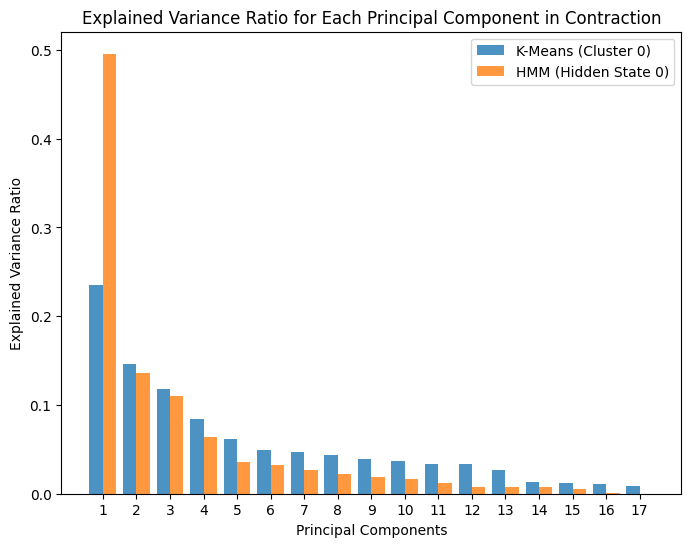

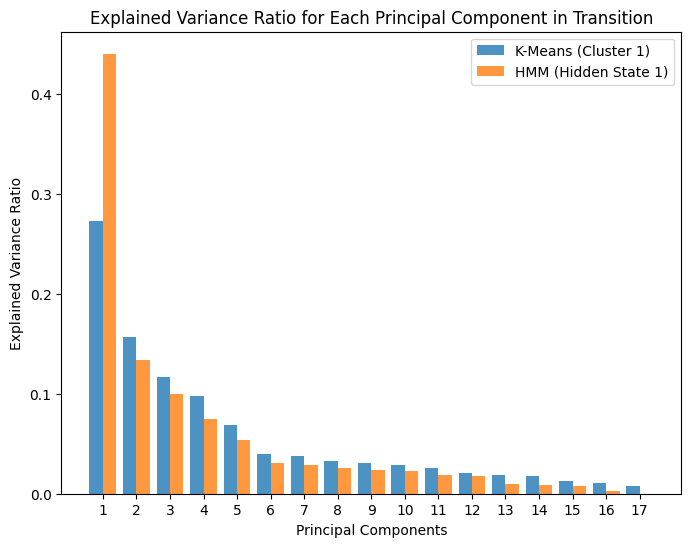

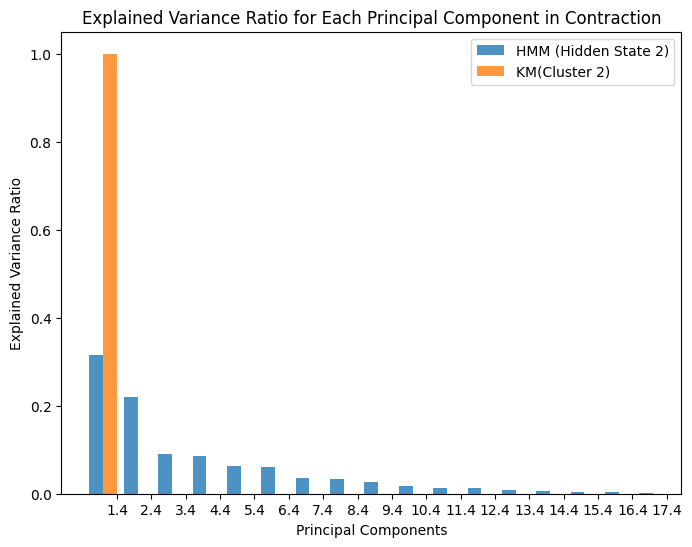

In [ ]:
# Assuming you have defined explained_variance_KM and explained_variance_HMM dictionaries
# with keys 'Cluster 0' and 'Hidden State 0', respectively

import matplotlib.pyplot as plt

title = 'Explained Variance Ratios for Contraction.png'

plt.figure(figsize=(8, 6))

# Plot bar chart for K-Means (Cluster 0)
bar_width = 0.4  # Adjust the width based on your preference
bar_positions_KM = range(1, len(explained_variance_KM['Cluster 0']) + 1)
plt.bar(bar_positions_KM, explained_variance_KM['Cluster 0'], width=bar_width, alpha=0.8, align='center', label='K-Means (Cluster 0)')

# Plot bar chart for HMM (Hidden State 0)
bar_positions_HMM = [pos + bar_width for pos in bar_positions_KM]
plt.bar(bar_positions_HMM, explained_variance_HMM['Hidden State 0'], width=bar_width, alpha=0.8, align='center', label='HMM (Hidden State 0)')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component in Contraction')
plt.legend()  # Add legend for better clarity
plt.xticks([pos + bar_width / 2 for pos in bar_positions_KM], bar_positions_KM)  # Center x-ticks between the bars
plt.savefig(title)
plt.show()

title = 'Explained Variance Ratios for Transition.png'
plt.figure(figsize=(8, 6))

# Plot bar chart for K-Means (Cluster 0)
bar_width = 0.4  # Adjust the width based on your preference
bar_positions_KM = range(1, len(explained_variance_KM['Cluster 1']) + 1)
plt.bar(bar_positions_KM, explained_variance_KM['Cluster 1'], width=bar_width, alpha=0.8, align='center', label='K-Means (Cluster 1)')

# Plot bar chart for HMM (Hidden State 0)
bar_positions_HMM = [pos + bar_width for pos in bar_positions_KM]
plt.bar(bar_positions_HMM, explained_variance_HMM['Hidden State 1'], width=bar_width, alpha=0.8, align='center', label='HMM (Hidden State 1)')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component in Transition')
plt.legend()  # Add legend for better clarity
plt.xticks([pos + bar_width / 2 for pos in bar_positions_KM], bar_positions_KM)  # Center x-ticks between the bars
plt.savefig(title)
plt.show()



title = 'Explained Variance Ratios for Expansion.png'
plt.figure(figsize=(8, 6))

# Plot bar chart for K-Means (Cluster 0)
bar_width = 0.4  # Adjust the width based on your preference
bar_positions_HMM = range(1, len(explained_variance_HMM['Hidden State 2']) + 1)
plt.bar(bar_positions_HMM, explained_variance_HMM['Hidden State 2'], width=bar_width, alpha=0.8, align='center', label='HMM (Hidden State 2)')

# Plot bar chart for HMM (Hidden State 0)
bar_positions_KM = [pos + bar_width for pos in bar_positions_KM]
plt.bar(bar_positions_KM[:2], explained_variance_KM['Cluster 2'], width=bar_width, alpha=0.8, align='center', label='KM(Cluster 2)')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component in Contraction')
plt.legend()  # Add legend for better clarity
plt.xticks([pos + bar_width / 2 for pos in bar_positions_KM], bar_positions_KM)  # Center x-ticks between the bars
plt.savefig(title)
plt.show()



Here we calculate precision, recall and accuracy of kmeans in predicting global recessions.

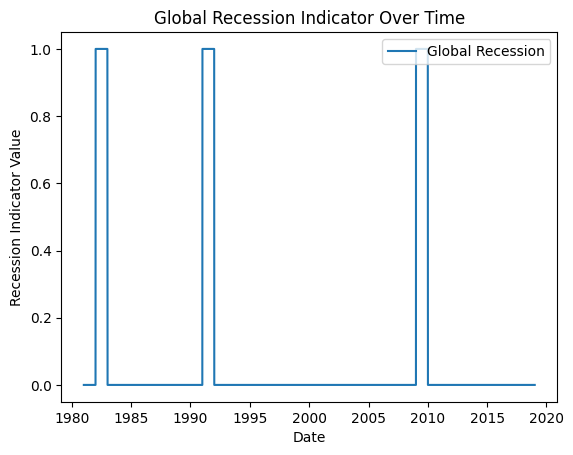

Training Accuracy, 01 = recc: 0.2313
Training Accuracy, 01 = NOT recc: 0.7687
Precision: 0.2733
Recall: 0.1104
Confusion Matrix:
[[7408  569]
 [1724  214]]
Training Accuracy, 01 = recc: 0.7529
Training Accuracy, 01 = NOT recc: 0.2471
Training Accuracy, 02 = recc: 0.3990
Training Accuracy, 02 = NOT recc: 0.6010


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame called returns_df

date_ranges = [
    ('1975-01-01', '1975-12-31'),
    ('1982-01-01', '1982-12-31'),
    ('1991-01-01', '1991-12-31'),
    ('2009-01-01', '2009-12-31'),
]

returns_df['Global Recession'] = 0  # Default value

# Set Recession values to 1 based on date_ranges
for start_date, end_date in date_ranges:
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    returns_df.loc[(returns_df.index >= start_date) & (returns_df.index <= end_date), 'Global Recession'] = 1

plt.plot(returns_df['Global Recession'], label='Global Recession')
plt.title('Global Recession Indicator Over Time')
plt.xlabel('Date')
plt.ylabel('Recession Indicator Value')
plt.legend(loc='upper right')  # Adjust the location based on your preference
plt.savefig('Global recessions.png')
plt.show()

# Create a copy of the DataFrame for testing purposes
testing_df = returns_df.copy()

# Swap values for testing_df and calculate accuracy
testing_df['Recession_01'] = testing_df['Cluster'].apply(lambda x: 0 if x in [0, 1] else 1)
train_accuracy_not_01 = accuracy_score(testing_df['Recession_01'], returns_df['Global Recession'])
print(f"Training Accuracy, 01 = NOT recc: {train_accuracy_not_01:.4f}")

from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(testing_df['Recession_01'], returns_df['Global Recession'])
recall = recall_score(testing_df['Recession_01'], returns_df['Global Recession'])

# Calculate confusion matrix (optional but useful for more detailed evaluation)
conf_matrix = confusion_matrix(testing_df['Recession_01'], returns_df['Global Recession'])

# Print results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)




Here we calculate the precision, recall and accuracy of K-means in predicting NBER official US recessions.

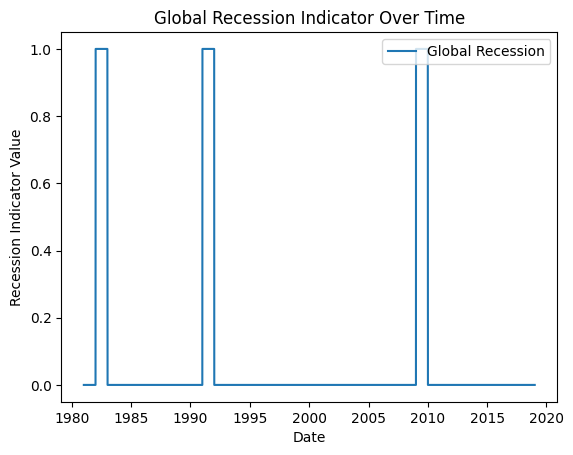

Training Accuracy, 01 = recc: 0.2313
Training Accuracy, 01 = NOT recc: 0.7687
Precision: 0.2733
Recall: 0.1104
Confusion Matrix:
[[7408  569]
 [1724  214]]
Training Accuracy, 01 = recc: 0.7529
Training Accuracy, 01 = NOT recc: 0.2471
Training Accuracy, 02 = recc: 0.3990
Training Accuracy, 02 = NOT recc: 0.6010


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame called returns_df

date_ranges = [
    ('1973-11-01', '1975-03-31'),
    ('1980-01-01', '1980-07-31'),
    ('1981-07-01', '1982-11-30'),
    ('1990-07-01', '1990-07-31'),
    ('1991-03-01', '1991-03-31'),
    ('2001-03-01', '2001-11-30'),
    ('2007-12-01', '2009-06-30'),
]


returns_df['US Recession'] = 0  # Default value

# Set Recession values to 1 based on date_ranges
for start_date, end_date in date_ranges:
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    returns_df.loc[(returns_df.index >= start_date) & (returns_df.index <= end_date), 'Global Recession'] = 1

plt.plot(returns_df['Global Recession'], label='Global Recession')
plt.title('Global Recession Indicator Over Time')
plt.xlabel('Date')
plt.ylabel('Recession Indicator Value')
plt.legend(loc='upper right')  # Adjust the location based on your preference
plt.savefig('Global recessions.png')
plt.show()

# Create a copy of the DataFrame for testing purposes
testing_df = returns_df.copy()

# Swap values for testing_df and calculate accuracy
testing_df['Recession_01'] = testing_df['Cluster'].apply(lambda x: 0 if x in [0, 1] else 1)
train_accuracy_not_01 = accuracy_score(testing_df['Recession_01'], returns_df['US Recession'])
print(f"Training Accuracy, 01 = NOT recc: {train_accuracy_not_01:.4f}")

from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(testing_df['Recession_01'], returns_df['US Recession'])
recall = recall_score(testing_df['Recession_01'], returns_df['US Recession'])

# Calculate confusion matrix (optional but useful for more detailed evaluation)
conf_matrix = confusion_matrix(testing_df['Recession_01'], returns_df['US Recession'])

# Print results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)




In [ ]:
date_ranges = [
    ('1973-11-01', '1975-03-31'),
    ('1980-01-01', '1980-07-31'),
    ('1981-07-01', '1982-11-30'),
    ('1990-07-01', '1990-07-31'),
    ('1991-03-01', '1991-03-31'),
    ('2001-03-01', '2001-11-30'),
    ('2007-12-01', '2009-06-30'),
]

returns_df['Recession'] = 0  # Default value

for start_date, end_date in date_ranges:
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    returns_df.loc[(returns_df.index >= start_date) & (returns_df.index <= end_date), 'Recession'] = 1

# Creating a copy for testing_df
testing_df = returns_df.copy()

from sklearn.decomposition import PCA

def rank_top_contributors(column_df, n_top=5):
    abs_column = np.abs(column_df)
    abs_loadings = pd.Series(abs_column, index=returns_df.columns)
    top_contributors = abs_loadings.nlargest(n_top).index.tolist()
    return top_contributors

top_contributors = {f'Cluster {i}':[] for i in range(2)} #set as list
explained_variance_ratio_US = {f'Cluster {i}':[] for i in range(2)} #set as list

for cluster in range(2):
    # Select rows for the current hidden state
    returns_state_df = returns_df[returns_df['Recession'] == cluster]
    returns_state_df = returns_state_df.drop('Recession', axis = 1)

    # Perform PCA on the selected rows
    pca = PCA()
    principal_components = pca.fit_transform(returns_state_df.iloc[:, :-1])  # Exclude 'HiddenState'

    # Create a DataFrame with the principal components
    result_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, len(principal_components[0]) + 1)], index=returns_state_df.index)

    # Calculate the loadings (contributions) of each currency for each principal component
    loadings_matrix = pca.components_

    # Explained variance ratio

  # Select the number of components based on the explained variance ratio
  # You can set a threshold, for example, 95% of variance explained
    cumulative_variance_ratio = explained_variance_ratio.cumsum()
    num_components = len(cumulative_variance_ratio[cumulative_variance_ratio < 0.95]) + 1
    print(f"Number of components to explain 95% of variance: {num_components}")

    eigenvalues = pca.explained_variance_

    # Print the eigenvalues
    print("Eigenvalues:")
    for i, eigenvalue in enumerate(eigenvalues):
      print(f"Eigenvalue {i + 1}: {eigenvalue}")

    # Create a DataFrame with the loadings matrix
    loadings_df = pd.DataFrame(loadings_matrix, columns=result_df.columns, index=returns_state_df.columns[:-1])  # Exclude 'HiddenState'
    print(result_df.columns)
    print(returns_state_df.columns[:-1])
    # Create a DataFrame with the top contributors for each individual column of the loadings matrix

    top_contributors_state_df = pd.DataFrame()
    #top_contributors_state_df = pd.DataFrame(index=returns_df.columns[:-1])  # Exclude 'HiddenState'
    for col in loadings_df.columns:
        top_contributors_state_df[col] = rank_top_contributors(loadings_df[col])

    # Append the top contributors DataFrame to the main DataFrame
    title = 'Cluster '+str(cluster)
    top_contributors[title].append(top_contributors_state_df)
    explained_variance_ratio_US[title]= pca.explained_variance_ratio_

for i in range(2):
  print('Non-recession', top_contributors['Cluster 0'])
  print('Recession', top_contributors['Cluster 1'])



Number of components to explain 95% of variance: 11
Eigenvalues:
Eigenvalue 1: 0.0002202693769687739
Eigenvalue 2: 7.07495093956551e-05
Eigenvalue 3: 5.5345331704130213e-05
Eigenvalue 4: 4.180169090583429e-05
Eigenvalue 5: 3.408930408101432e-05
Eigenvalue 6: 2.7962145688355962e-05
Eigenvalue 7: 1.8813153207745052e-05
Eigenvalue 8: 1.813868807647717e-05
Eigenvalue 9: 1.5203642266722548e-05
Eigenvalue 10: 1.501605756014136e-05
Eigenvalue 11: 1.2861430901364094e-05
Eigenvalue 12: 1.1310575988036892e-05
Eigenvalue 13: 1.0241034437368915e-05
Eigenvalue 14: 8.461211895261067e-06
Eigenvalue 15: 7.0530718195183365e-06
Eigenvalue 16: 4.615053782365692e-06
Eigenvalue 17: 3.3349712133957765e-06
Eigenvalue 18: 0.0
Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'],
      dtype='object')
Index(['Australia', 'Canada', 'China', 'Denmark', 'Hong Kong', 'India',
       'Japan', 'Malaysia', 'New Zealand', '

Here, we run PCA on actual global recessions, as defined by IMF.

In [ ]:
date_ranges = [
    ('1975-01-01', '1975-12-31'),
    ('1982-01-01', '1982-12-31'),
    ('1991-01-01', '1991-12-31'),
    ('2009-01-01', '2009-12-31'),
]


returns_df['Recession'] = 0  # Default value

for start_date, end_date in date_ranges:
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    returns_df.loc[(returns_df.index >= start_date) & (returns_df.index <= end_date), 'Recession'] = 1

# Creating a copy for testing_df
testing_df = returns_df.copy()

from sklearn.decomposition import PCA

def rank_top_contributors(column_df, n_top=5):
    abs_column = np.abs(column_df)
    abs_loadings = pd.Series(abs_column, index=returns_df.columns)
    top_contributors = abs_loadings.nlargest(n_top).index.tolist()
    return top_contributors

top_contributors = {f'Cluster {i}':[] for i in range(2)} #set as list
explained_variance_ratio_Global = {f'Cluster {i}':[] for i in range(2)} #set as list

for cluster in range(2):
    # Select rows for the current hidden state
    returns_state_df = returns_df[returns_df['Recession'] == cluster]
    returns_state_df = returns_state_df.drop('Recession', axis = 1)

    # Perform PCA on the selected rows
    pca = PCA()
    principal_components = pca.fit_transform(returns_state_df.iloc[:, :-1])  # Exclude 'HiddenState'

    # Create a DataFrame with the principal components
    result_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, len(principal_components[0]) + 1)], index=returns_state_df.index)

    # Calculate the loadings (contributions) of each currency for each principal component
    loadings_matrix = pca.components_

    # Explained variance ratio

  # Select the number of components based on the explained variance ratio
  # You can set a threshold, for example, 95% of variance explained
    cumulative_variance_ratio = explained_variance_ratio.cumsum()
    num_components = len(cumulative_variance_ratio[cumulative_variance_ratio < 0.95]) + 1
    print(f"Number of components to explain 95% of variance: {num_components}")

    eigenvalues = pca.explained_variance_

    # Print the eigenvalues
    print("Eigenvalues:")
    for i, eigenvalue in enumerate(eigenvalues):
      print(f"Eigenvalue {i + 1}: {eigenvalue}")

    # Create a DataFrame with the loadings matrix
    loadings_df = pd.DataFrame(loadings_matrix, columns=result_df.columns, index=returns_state_df.columns[:-1])  # Exclude 'HiddenState'
    print(result_df.columns)
    print(returns_state_df.columns[:-1])
    # Create a DataFrame with the top contributors for each individual column of the loadings matrix

    top_contributors_state_df = pd.DataFrame()
    #top_contributors_state_df = pd.DataFrame(index=returns_df.columns[:-1])  # Exclude 'HiddenState'
    for col in loadings_df.columns:
        top_contributors_state_df[col] = rank_top_contributors(loadings_df[col])

    # Append the top contributors DataFrame to the main DataFrame
    title = 'Cluster '+str(cluster)
    top_contributors[title].append(top_contributors_state_df)
    explained_variance_ratio_Global[title]=pca.explained_variance_ratio_

for i in range(2):
  print('Non-recession', top_contributors['Cluster 0'])
  print('Recession', top_contributors['Cluster 1'])



Number of components to explain 95% of variance: 11
Eigenvalues:
Eigenvalue 1: 0.00023077885822019533
Eigenvalue 2: 7.566089381570518e-05
Eigenvalue 3: 5.7424452910920964e-05
Eigenvalue 4: 4.108183350654897e-05
Eigenvalue 5: 3.619189086142852e-05
Eigenvalue 6: 2.907027511138898e-05
Eigenvalue 7: 1.8896597602726656e-05
Eigenvalue 8: 1.771615866636533e-05
Eigenvalue 9: 1.5747442329701153e-05
Eigenvalue 10: 1.4743854032455245e-05
Eigenvalue 11: 1.3432287588359568e-05
Eigenvalue 12: 1.1800068408954043e-05
Eigenvalue 13: 1.1006314426817087e-05
Eigenvalue 14: 9.078541095624265e-06
Eigenvalue 15: 7.187542895441746e-06
Eigenvalue 16: 4.740157970116285e-06
Eigenvalue 17: 3.6535151214742812e-06
Eigenvalue 18: 0.0
Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'],
      dtype='object')
Index(['Australia', 'Canada', 'China', 'Denmark', 'Hong Kong', 'India',
       'Japan', 'Malaysia', 'New Zealand', 

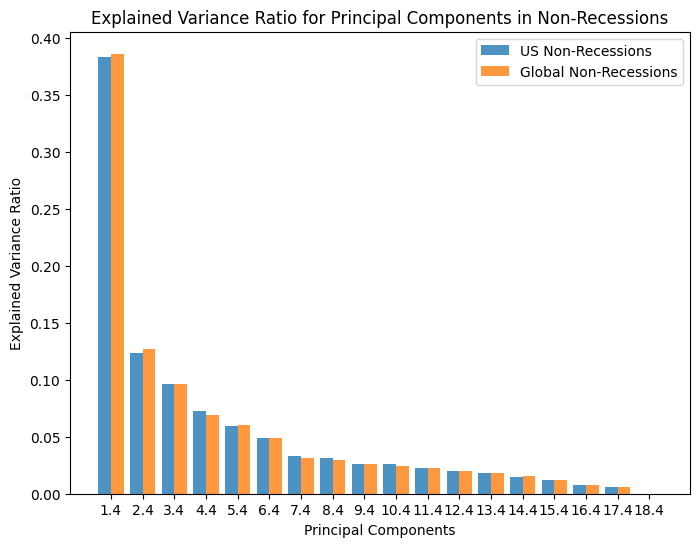

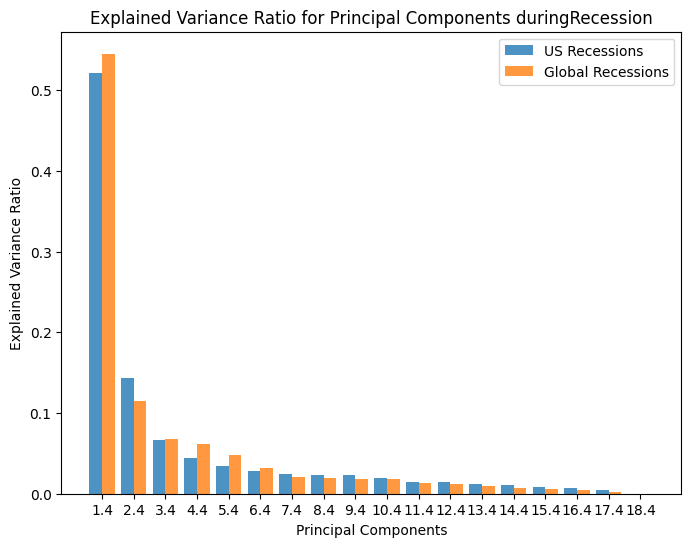

In [ ]:
import matplotlib.pyplot as plt

title = 'Explained Variance Ratios for Non-Recessions.png'

plt.figure(figsize=(8, 6))

# Plot bar chart for K-Means (Cluster 0)
bar_width = 0.4  # Adjust the width based on your preference
bar_positions_US = range(1, len(explained_variance_ratio_US['Cluster 0']) + 1)

plt.bar(bar_positions_US, explained_variance_ratio_US['Cluster 0'], width=bar_width, alpha=0.8, align='center', label='US Non-Recessions')

# Plot bar chart for HMM (Hidden State 0)
bar_positions_Global = [pos + bar_width for pos in bar_positions_US]
plt.bar(bar_positions_Global, explained_variance_ratio_Global['Cluster 0'], width=bar_width, alpha=0.8, align='center', label='Global Non-Recessions')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components in Non-Recessions')
plt.legend()  # Add legend for better clarity
plt.xticks([pos + bar_width / 2 for pos in bar_positions_US], bar_positions_Global)  # Center x-ticks between the bars
plt.savefig(title)
plt.show()



title = 'Explained Variance Ratios for Different Recessions.png'

plt.figure(figsize=(8, 6))

# Plot bar chart for K-Means (Cluster 0)
bar_width = 0.4  # Adjust the width based on your preference
bar_positions_US = range(1, len(explained_variance_ratio_US['Cluster 1']) + 1)

plt.bar(bar_positions_US, explained_variance_ratio_US['Cluster 1'], width=bar_width, alpha=0.8, align='center', label='US Recessions')

# Plot bar chart for HMM (Hidden State 0)
bar_positions_Global = [pos + bar_width for pos in bar_positions_US]
plt.bar(bar_positions_Global, explained_variance_ratio_Global['Cluster 1'], width=bar_width, alpha=0.8, align='center', label='Global Recessions')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components duringRecession')
plt.legend()  # Add legend for better clarity
plt.xticks([pos + bar_width / 2 for pos in bar_positions_US], bar_positions_Global)  # Center x-ticks between the bars
plt.savefig(title)
plt.show()

In [ ]:
factor_values = pd.DataFrame(
    data=np.dot(returns_state_df[:-1].values, loadings_matrix),
    columns=[f'Factor_{i+1}' for i in range(loadings_matrix.shape[1])],index=returns_df.index,
) + 1

# Loop through clusters and calculate cumulative returns
for cluster in range(2):
    cluster_returns = factor_values[returns_df['Cluster'] == cluster].copy()

    # Calculate cumulative product for each column
    cumulative_returns = cluster_returns.cumprod()
    last_row = cumulative_returns.iloc[-1]

    print(f'Cumulative Returns for Hidden State {cluster}:\n{last_row}\n')

    # Find the highest cumulative return in each column
    max_cumulative_returns = cumulative_returns.max()

    print(f'Highest Cumulative Returns for Hidden State {cluster}:\n{max_cumulative_returns}\n')

In [ ]:
!pip install tensorflow

In [ ]:
#code formatting

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load data from the Excel file into a DataFrame with headers
file_path = 'Currency12_07.csv'
exchange_df = pd.read_csv(file_path, header=0, index_col=0, parse_dates=True)

# Calculate returns for each column
returns_df = exchange_df.diff() / exchange_df.shift(1)
returns_df = returns_df.iloc[:, :]
returns_df.fillna(0, inplace=True)


cutoff = pd.to_datetime('2018-12-30', format='%Y-%m-%d')
X_train = returns_df[returns_df.index < cutoff]
X_test = returns_df[returns_df.index >= cutoff]



Prompt: Using Tensorflow for GM- VAE
Errors in the below code and how they were fixed:
Error 1: Issues with defining X_train
Input Size Initialization:

input_size = X_train.size should be replaced with input_size = X_train.shape[1] to get the number of features.
Data Loading in DataLoader:

The DataLoader should work with PyTorch Datasets, but in your case, X_train seems to be a DataFrame. You can convert it to a PyTorch Tensor using torch.from_numpy(X_train.values).

convert X_train to Tensor: data = data.float().view(-1, input_size)

Error 2: target must be between 0 and 1
Fix: switch reconstruction loss to MSE

This is running regular Gaussian prior, but we standardize data and recon_batch (runtime inputs of the loss function) so that we can use cross entropy error instead of MSE.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X_train is a DataFrame
# Replace this line with your actual data loading

# Standardize the input data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns)

# Define VAE model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, latent_size * 2)  # 2 for mean and log-variance
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()  # Output between 0 and 1 for image data
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # Encode
        encoded = self.encoder(x)

        # Split into mean and log-variance
        mu, logvar = torch.chunk(encoded, 2, dim=1)

        # Reparameterize
        z = self.reparameterize(mu, logvar)

        # Decode
        decoded = self.decoder(z)

        return decoded, mu, logvar

# Hyperparameters
input_size = X_train_scaled.shape[1]
hidden_size = 256
latent_size = 2  # Dimensionality of the latent space

# Build VAE model
vae = VAE(input_size, hidden_size, latent_size)

# Loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.BCELoss(reduction='sum')(recon_x, x)  # BCELoss for probabilities
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Optimizer
optimizer = optim.Adam(vae.parameters(), lr=0.001)

# Convert X_train_scaled to PyTorch Tensor
X_train_tensor = torch.from_numpy(X_train_scaled.values).float()

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0
    for batch_idx, (data,) in enumerate(train_loader):  # Remove the unnecessary label _
        data = torch.sigmoid(data)  # Apply sigmoid to input data
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(data)
        recon_batch = torch.sigmoid(recon_batch)  # Apply sigmoid to reconstructed batch
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader.dataset)}')

# Sample from the VAE
with torch.no_grad():
    # Sample from the latent space
    z_sample = torch.randn(64, latent_size)
    # Decode the samples
    sample = torch.sigmoid(vae.decoder(z_sample)).view(64, 1, input_size)  # Apply sigmoid to generated samples
    # Save or visualize the generated samples as needed


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/10, Loss: 11.835940591479007
Epoch 2/10, Loss: 11.78659973667989
Epoch 3/10, Loss: 11.784750558042752
Epoch 4/10, Loss: 11.784175801597105
Epoch 5/10, Loss: 11.783960112432288
Epoch 6/10, Loss: 11.783952045026911
Epoch 7/10, Loss: 11.783747212988567
Epoch 8/10, Loss: 11.78368230424607
Epoch 9/10, Loss: 11.783811419682046
Epoch 10/10, Loss: 11.78356199521444


This is the code for **Gaussian mixture** prior, using the loss function $L(\lambda) =  \Sigma_y q(y|x) (\log(y|x) - \log p(y) + \log q(z|x, y) - \log p(z|y) - \log p(x|y, z))$

from Quantitative Brokers

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X_train is a DataFrame
# Replace this line with your actual data loading

# Standardize the input data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns)

# Define VAE model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, latent_size * 2)  # 2 for mean and log-variance
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()  # Output between 0 and 1 for image data
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # Encode
        encoded = self.encoder(x)

        # Split into mean and log-variance
        mu, logvar = torch.chunk(encoded, 2, dim=1)

        # Reparameterize
        z = self.reparameterize(mu, logvar)

        # Decode
        decoded = self.decoder(z)

        return decoded, mu, logvar

# Hyperparameters
input_size = X_train_scaled.shape[1]
hidden_size = 256
latent_size = 2  # Dimensionality of the latent space

# Build VAE model
vae = VAE(input_size, hidden_size, latent_size)

# Loss function
def loss_function(recon_x, x, mu, logvar):
    # Reconstruction loss term
    BCE = nn.BCELoss(reduction='sum')(recon_x, x)

    # Latent space regularization terms
    KLD_y = -0.5 * torch.sum(1 + logvar[:, :latent_size] - mu[:, :latent_size].pow(2) - logvar[:, :latent_size].exp())
    KLD_z = -0.5 * torch.sum(1 + logvar[:, latent_size:] - mu[:, latent_size:].pow(2) - logvar[:, latent_size:].exp())

    # Overall loss
    loss = BCE + KLD_y + KLD_z
    return loss

# Optimizer
optimizer = optim.Adam(vae.parameters(), lr=0.001)

# Convert X_train_scaled to PyTorch Tensor
X_train_tensor = torch.from_numpy(X_train_scaled.values).float()

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0
    for batch_idx, (data,) in enumerate(train_loader):  # Remove the unnecessary label _
        data = torch.sigmoid(data)  # Apply sigmoid to input data
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(data)
        recon_batch = torch.sigmoid(recon_batch)  # Apply sigmoid to reconstructed batch
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader.dataset)}')

# Sample from the VAE
with torch.no_grad():
    # Sample from the latent space
    z_sample = torch.randn(64, latent_size)
    # Decode the samples
    sample = torch.sigmoid(vae.decoder(z_sample)).view(64, 1, input_size)  # Apply sigmoid to generated samples
    # Save or visualize the generated samples as needed


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/10, Loss: 11.835940591479007
Epoch 2/10, Loss: 11.78659973667989
Epoch 3/10, Loss: 11.784750558042752
Epoch 4/10, Loss: 11.784175801597105
Epoch 5/10, Loss: 11.783960112432288
Epoch 6/10, Loss: 11.783952045026911
Epoch 7/10, Loss: 11.783747212988567
Epoch 8/10, Loss: 11.78368230424607
Epoch 9/10, Loss: 11.783811419682046
Epoch 10/10, Loss: 11.78356199521444


This is the code for $\beta$-VAE with loss function given by \begin{align*}
\mathcal{L}(\lambda) &= \sum_y q(y|x) \left( \beta \cdot (\log q(y|x) - \log p(y) + \log q(z|x, y) - \log p(z|y)) - \log p(x|y, z) \right) \\
\end{align*}.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X_train is a DataFrame
# Replace this line with your actual data loading

# Standardize the input data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns)

# Define VAE model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size, beta):
        super(VAE, self).__init__()

        self.beta = beta

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, latent_size * 2)  # 2 for mean and log-variance
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()  # Output between 0 and 1 for image data
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # Encode
        encoded = self.encoder(x)

        # Split into mean and log-variance
        mu, logvar = torch.chunk(encoded, 2, dim=1)

        # Reparameterize
        z = self.reparameterize(mu, logvar)

        # Decode
        decoded = self.decoder(z)

        return decoded, mu, logvar

# Hyperparameters
input_size = X_train_scaled.shape[1]
hidden_size = 256
latent_size = 2  # Dimensionality of the latent space
beta = 1.0  # Adjust based on your problem and data characteristics

# Build VAE model
vae = VAE(input_size, hidden_size, latent_size, beta)

# Loss function
def loss_function(recon_x, x, mu, logvar, beta):
    BCE = nn.BCELoss(reduction='sum')(recon_x, x)
    KLD_y = -0.5 * torch.sum(1 + logvar[:, :latent_size] - mu[:, :latent_size].pow(2) - logvar[:, :latent_size].exp())
    KLD_z = -0.5 * torch.sum(1 + logvar[:, latent_size:] - mu[:, latent_size:].pow(2) - logvar[:, latent_size:].exp())
    return BCE + beta * (KLD_y + KLD_z)

# Optimizer
optimizer = optim.Adam(vae.parameters(), lr=0.001)

# Convert X_train_scaled to PyTorch Tensor
X_train_tensor = torch.from_numpy(X_train_scaled.values).float()

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)

# Training loop
num_epochs = 10
beta = 3
for epoch in range(num_epochs):
    total_loss = 0
    for batch_idx, (data,) in enumerate(train_loader):
        data = torch.sigmoid(data)  # Apply sigmoid to input data
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(data)
        recon_batch = torch.sigmoid(recon_batch)  # Apply sigmoid to reconstructed batch
        loss = loss_function(recon_batch, data, mu, logvar, beta)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader.dataset)}')

# Sample from the VAE
with torch.no_grad():
    # Sample from the latent space
    z_sample = torch.randn(64, latent_size)
    # Decode the samples
    sample = torch.sigmoid(vae.decoder(z_sample)).view(64, 1, input_size)  # Apply sigmoid to generated samples
    # Save or visualize the generated samples as needed


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/10, Loss: 11.840343103917837
Epoch 2/10, Loss: 11.786285206403397
Epoch 3/10, Loss: 11.78471484591773
Epoch 4/10, Loss: 11.784213145678176
Epoch 5/10, Loss: 11.78396352414418
Epoch 6/10, Loss: 11.783781970573258
Epoch 7/10, Loss: 11.783796633544405
Epoch 8/10, Loss: 11.78372933537192
Epoch 9/10, Loss: 11.783732088143067
Epoch 10/10, Loss: 11.78357667666056


Now... we attempt the HMM-VAE

In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
from hmmlearn import hmm
import numpy as np
import pandas as pd

# Check for NaN or Inf values in returns_df
if returns_df.isnull().values.any() or np.any(np.isinf(returns_df.values)):
    # Handle or remove NaN or inf values from returns_df
    returns_df = returns_df.replace([np.inf, -np.inf], np.nan).dropna()

cutoff = pd.to_datetime('2018-12-30', format='%Y-%m-%d')
X_train = returns_df[returns_df.index < cutoff]
X_test = returns_df[returns_df.index >= cutoff]

data = X_train  # Now defining data

# Step 2: Choose the number of components for the GMMHMM
n_components = 3  # Adjust based on your problem and data characteristics

# Step 3: Initialize GMMHMM
hmm_model = hmm.GMMHMM(n_components=n_components, covariance_type='full', algorithm='viterbi', n_iter=100)

# Check for NaN or Inf values in returns_df
if returns_df.isnull().values.any() or np.any(np.isinf(returns_df.values)):
    # Handle or remove NaN or inf values from returns_df
    returns_df = returns_df.replace([np.inf, -np.inf], np.nan).dropna()

predicted = hmm_model.fit(data)

Step 1: find the states using viterbi algorithm